In [1]:
import numpy as np
import tensorflow as tf

2023-10-06 20:54:36.538872: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers

In [3]:
#Load training and test data
(trainData, trainLabels), (testData, testLabels) = imdb.load_data(num_words = 10000)

#Transform test and training data to vectors for inputs
def vectorize(sequences, ndmin=10000):
    results = np.zeros((len(sequences), ndmin))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

#Input training data vectorized
xTrain = vectorize(trainData)
xTest = vectorize(testData)

#Test labels as scalars
yTrain = np.asarray(trainLabels).astype('float32')
yTest = np.asarray(testLabels).astype('float32')

#Test print to ensure working
print(len(xTrain))
xTrain[0]

25000


array([0., 1., 1., ..., 0., 0., 0.])

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.5635 - acc: 0.7611 - val_loss: 0.4442 - val_acc: 0.8620
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3684 - acc: 0.8895 - val_loss: 0.3405 - val_acc: 0.8841
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2747 - acc: 0.9147 - val_loss: 0.3136 - val_acc: 0.8787
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2191 - acc: 0.9307 - val_loss: 0.2885 - val_acc: 0.8846
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1832 - acc: 0.9417 - val_loss: 0.2779 - val_acc: 0.8888
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1578 - acc: 0.9490 - val_loss: 0.2852 - val_acc: 0.8862
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1376 - acc: 0.9573 - val_loss: 0.2834 - val_acc: 0.8863
Epoch 8/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1195 - a

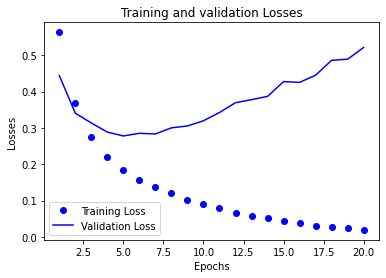

In [4]:
#Set up model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

xVal = xTrain[:10000]
partialX = xTrain[10000:]
yVal = yTrain[:10000]
partialY = yTrain[10000:]

history = model.fit(partialX, partialY, epochs = 20, batch_size = 512, validation_data = (xVal, yVal))

import matplotlib.pyplot as plt

history = history.history
history.keys()
losses = history['loss']
valLosses = history['val_loss']
acc = history['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, losses, 'bo', label='Training Loss')
plt.plot(epochs, valLosses, 'b', label='Validation Loss')
plt.title('Training and validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()
              



In [5]:
#Our model begins to underfit after around 3 epochs, and subsequently cannot accurately model training data
#We can try out some different techniques and parameter tunings to get this model working a bit better

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.6441 - acc: 0.6121 - val_loss: 0.5619 - val_acc: 0.7972
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5437 - acc: 0.7393 - val_loss: 0.4734 - val_acc: 0.8608
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.4636 - acc: 0.8074 - val_loss: 0.3790 - val_acc: 0.8795
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.4019 - acc: 0.8475 - val_loss: 0.3339 - val_acc: 0.8848
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3523 - acc: 0.8738 - val_loss: 0.3043 - val_acc: 0.8852
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3133 - acc: 0.8904 - val_loss: 0.2863 - val_acc: 0.8878
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2816 - acc: 0.9050 - val_loss: 0.2907 - val_acc: 0.8858
Epoch 8/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2518 - a

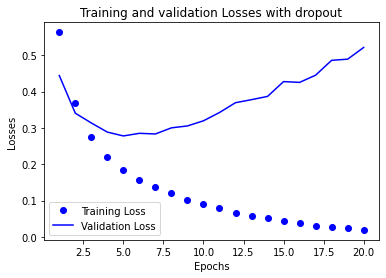

In [6]:
#Amending the previous model with dropout
#Dropout applies to a layer a random zero value in the output during training
#Introducing noise in the form of zero values in output layer can break up happenstance patterns that are not significant

#Define and compile a new model with dropout 
dropoutModel = models.Sequential()
dropoutModel.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dropoutModel.add(layers.Dropout(0.5))
dropoutModel.add(layers.Dense(16, activation='relu'))
dropoutModel.add(layers.Dropout(0.5))
dropoutModel.add(layers.Dense(1, activation='sigmoid'))
dropoutModel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

#Obtain relavent stats in the history
history = dropoutModel.fit(partialX, partialY, epochs=20, batch_size=512, validation_data=(xVal, yVal))

history = history.history
history.keys()
dropoutLosses = history['loss']
dropoutValLosses = history['val_loss']
dropoutAcc = history['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, losses, 'bo', label='Training Loss')
plt.plot(epochs, valLosses, 'b', label='Validation Loss')
plt.title('Training and validation Losses with dropout')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

In [7]:
#Both models seem to severely underfit (wherein a model is unable to accurately model the training data)
#Let's try reducing the epochs

In [8]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics = ["acc"])

xVal = xTrain[:10000]
partialX = xTrain[10000:]
yVal = yTrain[:10000]
partialY = yTrain[10000:]

history = model.fit(partialX, partialY, epochs = 10, batch_size = 512, validation_data = (xVal, yVal))

import matplotlib.pyplot as plt

history = history.history
history.keys()
losses = history['loss']
valLosses = history['val_loss']
acc = history['acc']

Epoch 1/10
30/30 [==============================] - 2s 51ms/step - loss: 0.5438 - acc: 0.7853 - val_loss: 0.4240 - val_acc: 0.8488
Epoch 2/10
30/30 [==============================] - 1s 24ms/step - loss: 0.3485 - acc: 0.8863 - val_loss: 0.3314 - val_acc: 0.8798
Epoch 3/10
30/30 [==============================] - 1s 17ms/step - loss: 0.2621 - acc: 0.9113 - val_loss: 0.2919 - val_acc: 0.8860
Epoch 4/10
30/30 [==============================] - 1s 18ms/step - loss: 0.2123 - acc: 0.9300 - val_loss: 0.3067 - val_acc: 0.8732
Epoch 5/10
30/30 [==============================] - 1s 17ms/step - loss: 0.1804 - acc: 0.9402 - val_loss: 0.2825 - val_acc: 0.8863
Epoch 6/10
30/30 [==============================] - 1s 18ms/step - loss: 0.1547 - acc: 0.9505 - val_loss: 0.2811 - val_acc: 0.8864
Epoch 7/10
30/30 [==============================] - 1s 19ms/step - loss: 0.1328 - acc: 0.9599 - val_loss: 0.2945 - val_acc: 0.8831
Epoch 8/10
30/30 [==============================] - 1s 19ms/step - loss: 0.1158 - a

Epoch 1/10
30/30 [==============================] - 2s 58ms/step - loss: 0.6331 - acc: 0.6306 - val_loss: 0.5191 - val_acc: 0.8473
Epoch 2/10
30/30 [==============================] - 1s 22ms/step - loss: 0.5109 - acc: 0.7716 - val_loss: 0.4132 - val_acc: 0.8669
Epoch 3/10
30/30 [==============================] - 1s 19ms/step - loss: 0.4337 - acc: 0.8261 - val_loss: 0.3539 - val_acc: 0.8815
Epoch 4/10
30/30 [==============================] - 1s 21ms/step - loss: 0.3720 - acc: 0.8631 - val_loss: 0.3207 - val_acc: 0.8748
Epoch 5/10
30/30 [==============================] - 1s 22ms/step - loss: 0.3312 - acc: 0.8841 - val_loss: 0.2900 - val_acc: 0.8901
Epoch 6/10
30/30 [==============================] - 1s 20ms/step - loss: 0.2896 - acc: 0.9024 - val_loss: 0.2827 - val_acc: 0.8905
Epoch 7/10
30/30 [==============================] - 1s 19ms/step - loss: 0.2606 - acc: 0.9153 - val_loss: 0.2759 - val_acc: 0.8912
Epoch 8/10
30/30 [==============================] - 1s 19ms/step - loss: 0.2301 - a

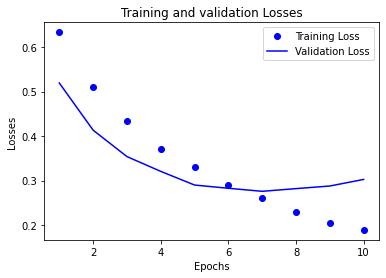

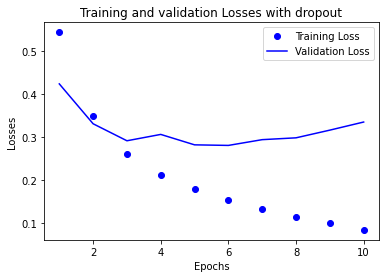

In [9]:
dropoutModel = models.Sequential()
dropoutModel.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dropoutModel.add(layers.Dropout(0.5))
dropoutModel.add(layers.Dense(16, activation='relu'))
dropoutModel.add(layers.Dropout(0.5))
dropoutModel.add(layers.Dense(1, activation='sigmoid'))
dropoutModel.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

#Obtain relavent stats in the history
history = dropoutModel.fit(partialX, partialY, epochs=10, batch_size=512, validation_data=(xVal, yVal))

history = history.history
history.keys()
dropoutLosses = history['loss']
dropoutValLosses = history['val_loss']
dropoutAcc = history['acc']

epochs = range(1, len(acc) + 1)

#Plot
plt.plot(epochs, dropoutLosses, 'bo', label='Training Loss')
plt.plot(epochs, dropoutValLosses, 'b', label='Validation Loss')
plt.title('Training and validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

plt.plot(epochs, losses, 'bo', label='Training Loss')
plt.plot(epochs, valLosses, 'b', label='Validation Loss')
plt.title('Training and validation Losses with dropout')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()



In [10]:
#Seems we acheived a much better fit with less epochs on the standard model, however the dropout model
#yet needs more tuning as it is still underfitting, though not as drastically as with epochs set to 20